In [ ]:
#http://blog.espol.edu.ec/analisisnumerico/regresion-polinomial-de-grado-m-ejercicio-temperatura-para-un-dia/

 columnas en tabla: 
Index(['No', 'Date', 'Time', 'ColdJunc0', 'PowerVolt', 'PowerKind', 'WS(ave)',
       'WD(ave)', 'WS(max)', 'WD(most)', 'WS(inst_m)', 'WD(inst_m)',
       'Max_time', 'Solar_rad', 'TEMP', 'Humidity', 'Rainfall', 'Bar_press.',
       'Soil_temp', 'fecha', 'horadec'],
      dtype='object')
ymedia =  23.66875000000001
 f = -6.9832451345603e-6*x**6 + 0.00060294252788029*x**5 - 0.0188841467311964*x**4 + 0.258018353359285*x**3 - 1.45059918791765*x**2 + 2.97733756144035*x + 18.2975696351048
coef_determinacion r2 =  0.9849975002572631
98.5% de los datos
     se describe con el modelo


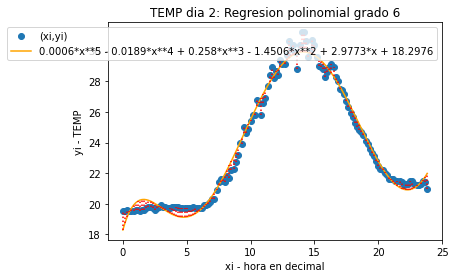

In [3]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator


# INGRESO
#narchivo = "./data/2021OctubreEstMetorologica.csv"
narchivo = "./data/2021_10_EstMeteorologica.csv"

sensor = 'TEMP'
undia  = 2 # dia a revisar
gradom = 6 # grado del polinomio

# PROCEDIMIENTO
tabla = pd.read_csv(narchivo, sep=';',decimal=',')
n_tabla = len(tabla)

# fechas concatenando columnas de texto
tabla['fecha'] = tabla['Date']+' '+tabla['Time']

# convierte a datetime
fechaformato = "%d/%m/%Y %H:%M:%S"
tabla['fecha'] = pd.to_datetime(tabla['fecha'],
                                format=fechaformato)
# serie por dia, busca indices
diaIndice = [0] # indice inicial
for i in range(1,n_tabla-1,1):
    i0_fecha = tabla['fecha'][i-1]
    i1_fecha = tabla['fecha'][i]
    if i0_fecha.day != i1_fecha.day:
        diaIndice.append(i)
diaIndice.append(len(tabla)-1) # indice final
m = len(diaIndice)

# horas decimales en un día
horadia = tabla['fecha'].dt.hour
horamin = tabla['fecha'].dt.minute
horaseg = tabla['fecha'].dt.second
tabla['horadec'] = horadia + horamin/60 + horaseg/3600

# PROCEDIMIENTO Regresión Polinomial grado m
m = gradom
# Selecciona dia
i0 = diaIndice[undia]
i1 = diaIndice[undia+1]
# valores a usar en regresión
xi = tabla['horadec'][i0:i1]
yi = tabla[sensor][i0:i1]
n  = len(xi)

# llenar matriz a y vector B
k = m + 1
A = np.zeros(shape=(k,k),dtype=float)
B = np.zeros(k,dtype=float)
for i in range(0,k,1):
    for j in range(0,i+1,1):
        coeficiente = np.sum(xi**(i+j))
        A[i,j] = coeficiente
        A[j,i] = coeficiente
    B[i] = np.sum(yi*(xi**i))

# coeficientes, resuelve sistema de ecuaciones
C = np.linalg.solve(A,B)

# polinomio
x = sym.Symbol('x')
f = 0
fetiq = 0
for i in range(0,k,1):
    f = f + C[i]*(x**i)
    fetiq = fetiq + np.around(C[i],4)*(x**i)

fx = sym.lambdify(x,f)
fi = fx(xi)

# errores
ym = np.mean(yi)
xm = np.mean(xi)
errado = fi - yi

sr = np.sum((yi-fi)**2)
syx = np.sqrt(sr/(n-(m+1)))
st = np.sum((yi-ym)**2)

# coeficiente de determinacion
r2 = (st-sr)/st
r2_porcentaje = np.around(r2*100,2)

# SALIDA
print(' columnas en tabla: ')
print(tabla.keys())
print('ymedia = ',ym)
print(' f =',f)
print('coef_determinacion r2 = ',r2)
print(str(r2_porcentaje)+'% de los datos')
print('     se describe con el modelo')

# grafica
plt.plot(xi,yi,'o',label='(xi,yi)')
plt.plot(xi,fi, color='orange', label=fetiq)

# lineas de error
for i in range(i0,i1,1):
    y0 = np.min([yi[i],fi[i]])
    y1 = np.max([yi[i],fi[i]])
    plt.vlines(xi[i],y0,y1, color='red',
               linestyle = 'dotted')

plt.xlabel('xi - hora en decimal')
plt.ylabel('yi - '+ sensor)
plt.legend()
etiq_titulo = sensor+ ' dia '+str(undia)
plt.title(etiq_titulo+': Regresion polinomial grado '+str(m))
plt.show()